# Traffic Signs Classification
**Sao Kanneh S3788996**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image
import os
from glob import glob
import re
import numpy as np

In [2]:
# variables for training and testing path
datasetPath = 'datasets'
trainPath = os.path.join(datasetPath, 'train')
testPath = os.path.join(datasetPath, 'test')
shapes = ['diamond', 'hex', 'round', 'square', 'triangle']

Here I'm setting up a helper function to build a dataframe from paths. Because the training data is formatted in directories like so: <shape>/<type>

In [3]:
# creates dataframe using the provided path. returns the DataFrame with cos [path, shape, type]
def createTrainDfFromPath():
    print(f'trainPath: {trainPath}')
    train_signs_dict = {
        'path': [],
        'shape': [],
        'type': [],
        'pixels': [],
    }
    columns = ['path', 'shape', 'type', 'pixels']
    # loop through each shape, extract the relevant columns from their images
    for shape in shapes:
        shape_path = os.path.join(trainPath, f'{shape}/')
        print(f'adding images from {shape_path} to df')

        for imgPath in glob(f'{shape_path}/**/*.png', recursive=True):
            # use regex to get a list of directories in this path
            dir_list = re.findall('([a-zA-Z]+)', imgPath)
            im = Image.open(imgPath)
            # the sign-type is in the 3rd index
            sign_type = dir_list[3]
            train_signs_dict['path'].append(imgPath)
            train_signs_dict['shape'].append(shape)
            train_signs_dict['type'].append(sign_type)
            # store the image as a 2D array
            train_signs_dict['pixels'].append(np.asarray(im))
        print(f'{shape} added')

    return pd.DataFrame(train_signs_dict, columns=columns)

## EDA
In this section I will be exploring the images provided in the "train" subdirectory.

Before I can explore them though, I would like an easy way to manage their paths. the best way to do this is to add all image paths to a pandas DataFrame

In [4]:
tsigns2 = createTrainDfFromPath()

trainPath: datasets/train
adding images from datasets/train/diamond/ to df
diamond added
adding images from datasets/train/hex/ to df
hex added
adding images from datasets/train/round/ to df
round added
adding images from datasets/train/square/ to df
square added
adding images from datasets/train/triangle/ to df
triangle added


In [5]:
tsigns2.head()

,path,shape,type,pixels
0,datasets/train/diamond/rightofway/00039_00001.png,diamond,rightofway,"[[66, 67, 65, 66, 66, 65, 62, 59, 64, 66, 65, ..."
1,datasets/train/diamond/rightofway/01803_00002.png,diamond,rightofway,"[[58, 61, 60, 65, 75, 78, 81, 85, 83, 93, 97, ..."
2,datasets/train/diamond/rightofway/01702_00000.png,diamond,rightofway,"[[100, 102, 100, 101, 102, 100, 105, 104, 104,..."
3,datasets/train/diamond/rightofway/00111_00001.png,diamond,rightofway,"[[117, 133, 136, 105, 77, 126, 125, 92, 76, 11..."
4,datasets/train/diamond/rightofway/01231_00003.png,diamond,rightofway,"[[63, 74, 73, 45, 44, 45, 46, 46, 45, 44, 41, ..."


In [6]:
trafficSignsDf = createTrainDfFromPath()

trainPath: datasets/train
adding images from datasets/train/diamond/ to df
diamond added
adding images from datasets/train/hex/ to df
hex added
adding images from datasets/train/round/ to df
round added
adding images from datasets/train/square/ to df
square added
adding images from datasets/train/triangle/ to df
triangle added


In [7]:
trafficSignsDf.head()

,path,shape,type,pixels
0,datasets/train/diamond/rightofway/00039_00001.png,diamond,rightofway,"[[66, 67, 65, 66, 66, 65, 62, 59, 64, 66, 65, ..."
1,datasets/train/diamond/rightofway/01803_00002.png,diamond,rightofway,"[[58, 61, 60, 65, 75, 78, 81, 85, 83, 93, 97, ..."
2,datasets/train/diamond/rightofway/01702_00000.png,diamond,rightofway,"[[100, 102, 100, 101, 102, 100, 105, 104, 104,..."
3,datasets/train/diamond/rightofway/00111_00001.png,diamond,rightofway,"[[117, 133, 136, 105, 77, 126, 125, 92, 76, 11..."
4,datasets/train/diamond/rightofway/01231_00003.png,diamond,rightofway,"[[63, 74, 73, 45, 44, 45, 46, 46, 45, 44, 41, ..."


With the DF built, we can start looking at some of the images. We'll use PIL initially to display the images

In [8]:
pilIm = Image.open(trafficSignsDf['path'].iloc[0])
display(pilIm)

PIL seems to display them in a very small format, matplotlib may work best instead:

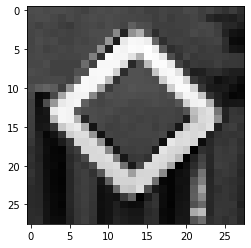

In [9]:
img = mpimg.imread(trafficSignsDf['path'].iloc[0])
imgplot = plt.imshow(img, cmap="gray")
plt.show()

As suspected, matplotlib gives a much better view that is scaled for visibility. Now we explore the images with confidence.

We'll start by looking at descriptive stats of our DF

In [10]:
trafficSignsDf.describe()

,path,shape,type,pixels
count,3699,3699,3699,3699
unique,3699,5,16,3699
top,datasets/train/round/speed/01012_00000.png,round,warning,"[[56, 53, 49, 43, 40, 43, 43, 40, 43, 47, 45, ..."
freq,1,1760,695,1


The value count of shapes:

In [11]:
trafficSignsDf['shape'].value_counts()

round       1760
triangle     926
square       688
diamond      282
hex           43
Name: shape, dtype: int64

and a plot of the value counts:

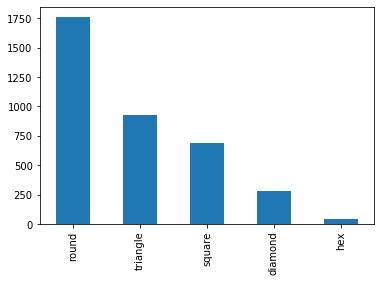

In [12]:
trafficSignsDf['shape'].value_counts().plot(kind='bar')

Observations:
* Most frequent shape in the dataset is the "round" shape with 1760 instances
* Hex is the lest frequent shape in the dataset with 43 instances

The above observations indicate a class imbalance. Because of this, accuracy may not be a good performance metric for the model that predicts shape.

And we repeat the same for sign-type (type in the DF)

In [13]:
trafficSignsDf['type'].value_counts()

warning             695
noentry             375
speed               316
bicycle             285
rightofway          282
parking             276
noparking           242
giveway             231
continue            199
trafficdirective    195
limitedtraffic      125
traveldirection     124
laneend             118
roundabout           98
crossing             95
stop                 43
Name: type, dtype: int64

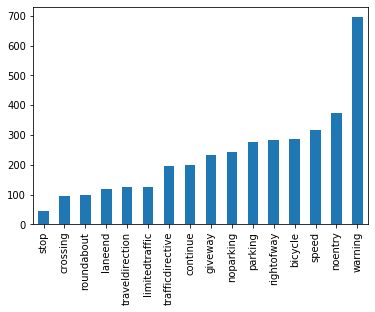

In [14]:
trafficSignsDf['type'].value_counts(ascending=True).plot(kind='bar')

Observations:
* 'noentry' is the most frequent value in the type column with 375 instances
* 'stop' is the least frequent value with 43 instances
* There are 14 unique "sign-type" values

Accuracy may not be the best performance metric due to the imbalanced classes. We may want to choose F2 or Average Precision as our performance metrics. A final decision can be made after some additional exploration

Next, let's see what shapes these sign types belong to

In [15]:
trafficSignsDf[['shape', 'type']]

,shape,type
0,diamond,rightofway
1,diamond,rightofway
2,diamond,rightofway
3,diamond,rightofway
4,diamond,rightofway
...,...,...
3694,triangle,warning
3695,triangle,warning
3696,triangle,warning
3697,triangle,warning


In [16]:
shapesDfs = []
for shape in shapes:
    shapesDfs.append(trafficSignsDf.loc[trafficSignsDf['shape'] == shape])

In [17]:
shapesDfs[1].head()

,path,shape,type,pixels
282,datasets/train/hex/stop/01951_00002.png,hex,stop,"[[33, 25, 23, 24, 23, 42, 33, 23, 27, 28, 31, ..."
283,datasets/train/hex/stop/01951_00001.png,hex,stop,"[[35, 27, 21, 20, 24, 29, 32, 33, 31, 27, 27, ..."
284,datasets/train/hex/stop/01951_00000.png,hex,stop,"[[29, 25, 27, 38, 53, 41, 46, 45, 75, 209, 211..."
285,datasets/train/hex/stop/01920_00000.png,hex,stop,"[[69, 70, 68, 67, 64, 63, 59, 59, 54, 55, 59, ..."
286,datasets/train/hex/stop/01811_00002.png,hex,stop,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


Best way to do this is to iterate through the shape-specific dfs created above.

In [18]:
for df in shapesDfs:
    print(f'{df["shape"].iloc[0]} -- associated sign-types value counts:')
    print(f'{df["type"].value_counts()}')
    print()

diamond -- associated sign-types value counts:
rightofway    282
Name: type, dtype: int64

hex -- associated sign-types value counts:
stop    43
Name: type, dtype: int64

round -- associated sign-types value counts:
noentry             375
speed               316
bicycle             285
noparking           242
trafficdirective    195
limitedtraffic      125
traveldirection     124
roundabout           98
Name: type, dtype: int64

square -- associated sign-types value counts:
parking     276
continue    199
laneend     118
crossing     95
Name: type, dtype: int64

triangle -- associated sign-types value counts:
warning    695
giveway    231
Name: type, dtype: int64



Observations:
 * Stop signs are the only types of signs in the shape of a hex
    * Additionally, there are only 43 stop signs in this dataset, which aligns with the number of hexes in the dataset
 * The only types of diamond signs are Right of Way signs.
    * Australia has a variety of diamond sign types, any we build model will not perform well on those in Australia
    * [Australia Diamond Signs](https://www.globalspill.com.au/product-category/road-signs/road-signs-road-signs/warning-road-signs/)
 * Round has the most variety of sign types, with No Entry being the most frequent sign type.
 * The only two types of triangle signs are:
    * warning -- most frequent sign type.
    * giveway

One possible approach may be to train one model on the shape of the signs, and another on the just their types. I can justify this as the sign-types have are easily separated along the shape feature.

Another possible approach is to "flatten" this strucutre, i.e. create boolean columns with the shape and sign type concatenated together - e.g. diamond_rightofway. Though I'm concerned about how this could affect the single model's biases.

We can't make any further observations without seeing the rest of the dataset. Let's build a function to randomly sample each dataset

In [53]:
# seed for reproducible results.
def sampleRandomNImages(n=5, seed=1):
    fig, axes = plt.subplots(nrows=len(shapesDfs), ncols=n, figsize=(14, 14))
    fig.tight_layout(h_pad=5, w_pad=5)
    row_iter = 0
    for df in shapesDfs:
        col_iter = 0
        for index, row in df.sample(n, random_state=seed).iterrows():
            axes[row_iter, col_iter].set_title(f'shape={row["shape"]}, type={row["type"]}', backgroundcolor="white")
            axes[row_iter, col_iter].imshow(row['pixels'], cmap="gray")
            col_iter += 1
        row_iter += 1

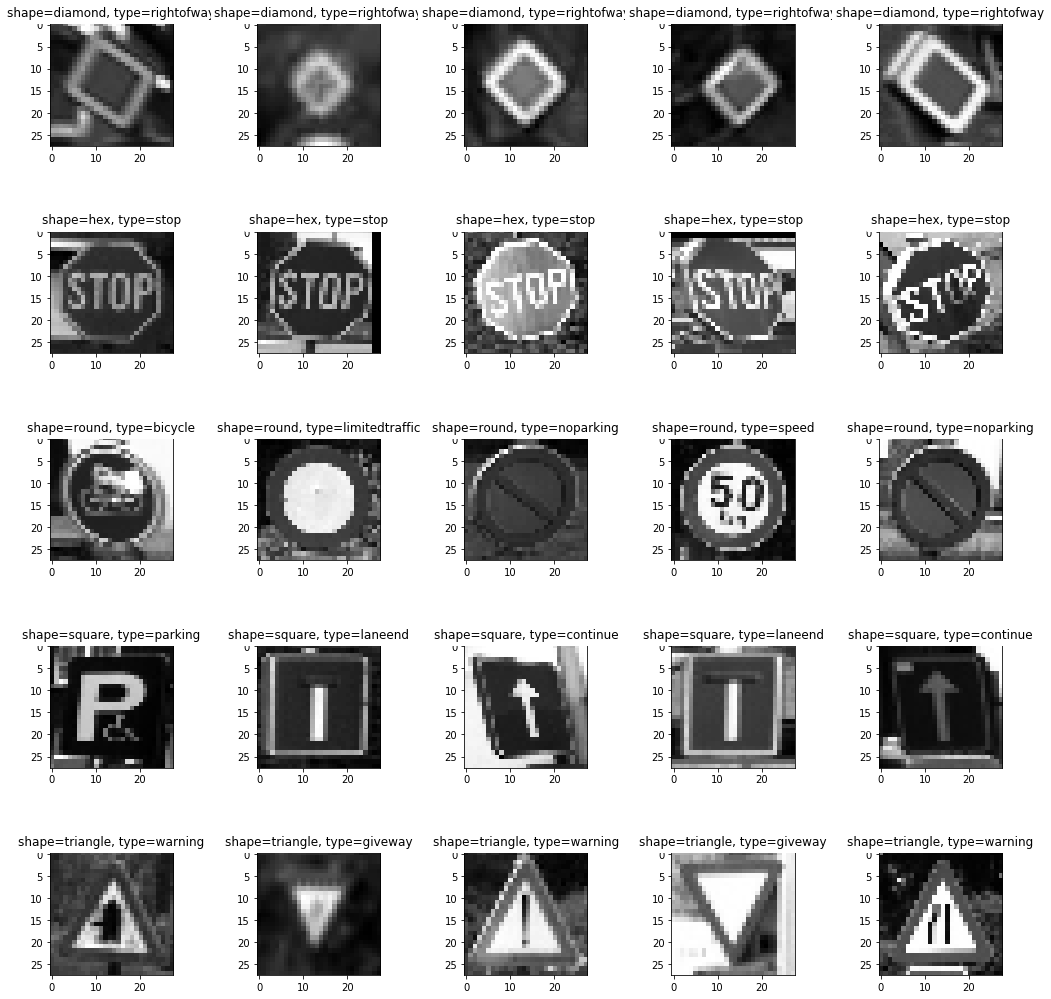

In [54]:
sampleRandomNImages()

In [21]:
im_mat = [shapesDfs[0]['pixels'].iloc[0].ravel()]

np.concatenate((im_mat, [shapesDfs[0]['pixels'].iloc[1].ravel()]))

array([[66, 67, 65, ..., 48, 52, 42],
       [58, 61, 60, ..., 79, 83, 58]], dtype=uint8)

And now let's look at the average diamond image

In [22]:
# util to calculate mean across the sign shape column
def calcMeanShapeImg(df):
    img_mat = None
    for idx, row in df.iterrows():
        row_pix = [row['pixels'].ravel()]
        if img_mat is None:
            img_mat = row_pix
        else:
            img_mat = np.concatenate((img_mat, row_pix))

    mean_img = np.mean(img_mat, axis=0)
    mean_img = mean_img.reshape((28, 28))
    return mean_img


# verify it works as expected
calcMeanShapeImg(shapesDfs[0])

array([[103.95744681, 103.5212766 , 104.24113475, 103.26595745,
        104.53900709, 106.        , 106.52836879, 106.93262411,
        106.19503546, 105.23758865, 104.03546099, 102.42198582,
        102.23049645, 101.79787234, 101.26950355, 101.56028369,
        101.74822695,  98.63829787,  97.9751773 ,  99.62056738,
        101.06382979, 102.77304965, 101.0141844 , 100.13829787,
        100.71276596,  98.58510638,  98.11702128,  99.46099291],
       [103.5177305 , 103.87234043, 104.82269504, 104.31914894,
        103.45744681, 104.46808511, 105.66666667, 106.58156028,
        104.84042553, 103.13829787, 102.37588652, 101.20567376,
         99.69503546,  96.55319149,  96.74822695, 100.68439716,
        100.42198582,  98.5       ,  98.40070922,  99.38297872,
        100.83687943, 101.4787234 , 100.20921986,  99.26950355,
        100.5106383 ,  98.5035461 ,  99.0106383 , 100.69858156],
       [100.44680851, 101.71631206, 103.83333333, 103.91843972,
        103.37234043, 103.4929078 , 10

In [23]:
# util function to calculate average image based on shape, sign-type, or both.
def calcMeanImg():
    mean_dict = {
        'diamond': [],
        'hex': [],
        'round': [],
        'square': [],
        'triangle': []
    }
    for df in shapesDfs:
        mean_dict[df['shape'].iloc[0]] = calcMeanShapeImg(df)

    return mean_dict

In [27]:
# save memory and performance, calculate meanImages once
shapeMeans = calcMeanImg()

In [45]:
def displayShapeMeans():
    fig, axes = plt.subplots(3, 2, figsize=(14, 14))
    row_iter = 0
    col_iter = 0
    for sign_shape in shapes:
        axes[row_iter, col_iter].set_title(f'{sign_shape} Mean Image')
        axes[row_iter, col_iter].imshow(shapeMeans[sign_shape], cmap="gray")
        col_iter += 1
        if col_iter > 1:
            row_iter += 1
            col_iter = 0

ValueError: cannot delete array elements

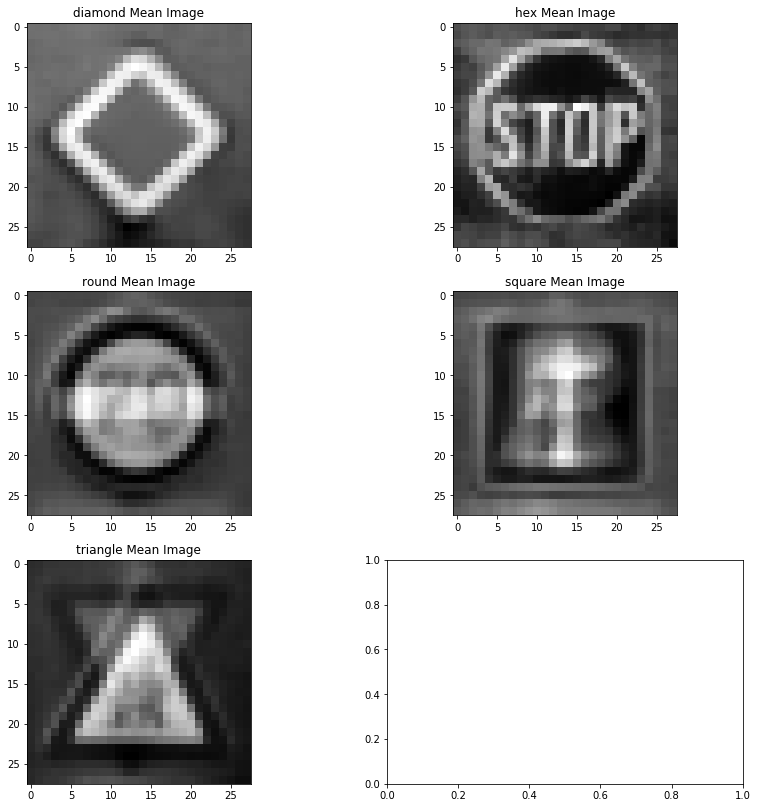

In [46]:
displayShapeMeans()

Observations:
* round and hex have very similar shapes/edges
* there seem to be more triangles pointing upwards than downwards in the dataset
* Diamond & Hex means reaffirm prior observations that they each only have 1 sign-type

Let's see what the contrast is between each mean image

In [30]:
def calcMeanDiff(im1, im2):
    return im1 - im2

In [32]:
t = list(shapeMeans)
t[:0] + t[1:]

['hex', 'round', 'square', 'triangle']

In [49]:
def displayShapeContrast():
    fig, axes = plt.subplots(5, 4, figsize=(14,14))
    fig.tight_layout(h_pad=5, w_pad=5)
    for i in range(0, 5):
        shape_name = shapes[i]
        ex_i_list = shapes[:i] + shapes[i + 1:]
        im1 = shapeMeans[shapes[i]]
        col_iter = 0
        for k in ex_i_list:
            contrast = calcMeanDiff(im1, shapeMeans[k])
            axes[i, col_iter].set_title(f'Diff between {shape_name} & {k}')
            axes[i, col_iter].imshow(contrast, cmap="gray")
            col_iter += 1

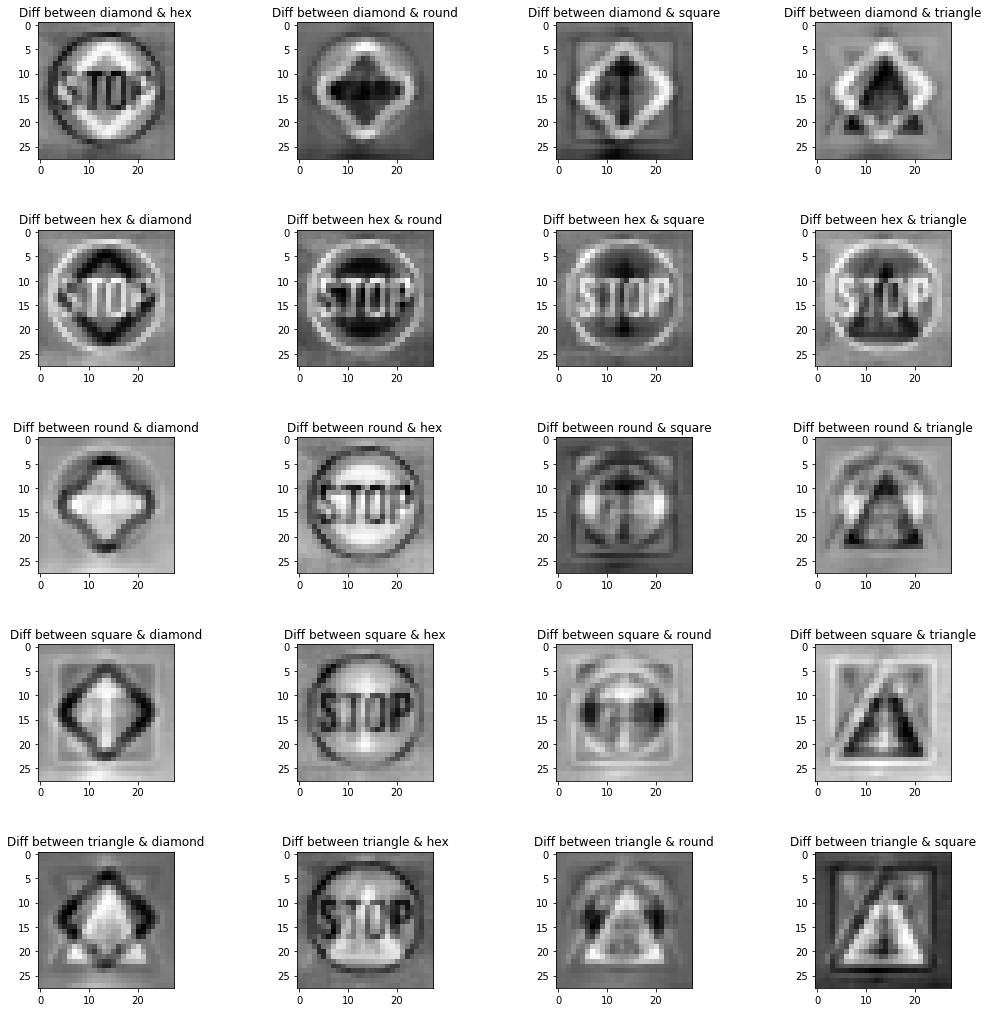

In [50]:
displayShapeContrast()

Observations:
* As above, round and hex have similar edges, but the "stop" in hex presents a prominent difference.